<a href="https://colab.research.google.com/github/li0ne/q-macro/blob/main/HPfileterione_finalver_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

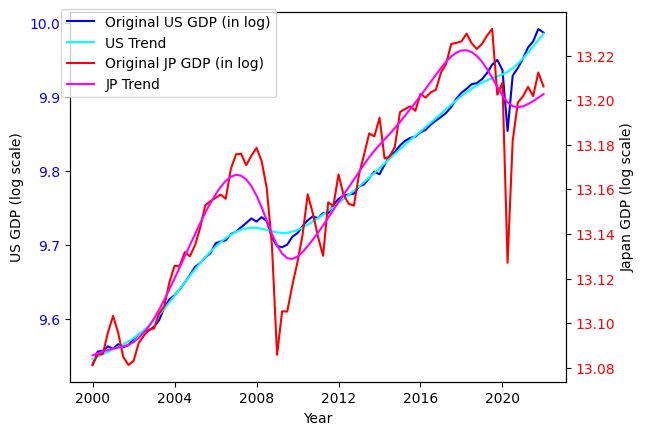

Standard Deviation of US GDP growth: GDPC1    0.022253
dtype: float64
Standard Deviation of Japan GDP growth: JPNRGDPEXP    0.026047
dtype: float64


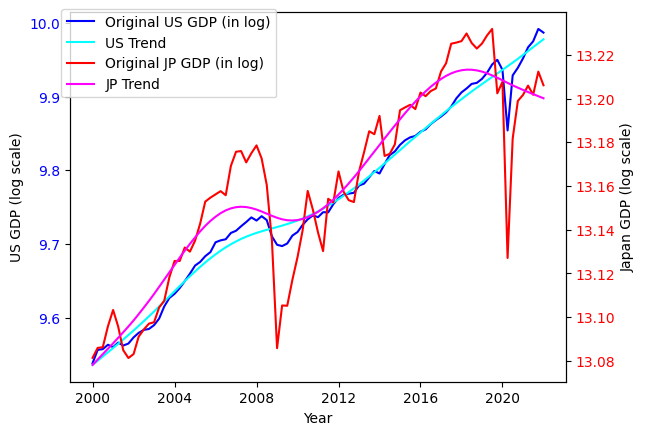

In [4]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# set the start and end dates for the data
start_date = '2000-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp_us = web.DataReader('GDPC1', 'fred', start_date, end_date)
gdp_jp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_us = np.log(gdp_us)
log_gdp_jp = np.log(gdp_jp)


# calculate the quarterly percent change in real GDP
gdp_us_pct_change = gdp_us.pct_change(4)
gdp_jp_pct_change = gdp_jp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_us, trend_us = sm.tsa.filters.hpfilter(log_gdp_us, lamb=100)
cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=100)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot US GDP data on the primary y-axis
ax1.plot(log_gdp_us, label="Original US GDP (in log)", color='blue')
ax1.plot(trend_us, label="US Trend", color='cyan')
ax1.set_xlabel('Year')
ax1.set_ylabel('US GDP (log scale)')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot the Japanese GDP data
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot Japanese GDP data on the secondary y-axis
ax2.plot(log_gdp_jp, label="Original JP GDP (in log)", color='red')
ax2.plot(trend_jp, label="JP Trend", color='magenta')
ax2.set_ylabel('Japan GDP (log scale)')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends for both y-axes
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()



# calculate the quarterly percent change in real GDP
gdp_us_pct_change = gdp_us.pct_change(4).dropna()
gdp_jp_pct_change = gdp_jp.pct_change(4).dropna()

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_us, trend_us = sm.tsa.filters.hpfilter(log_gdp_us, lamb=1600)
cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=1600)

# Calculate the standard deviation of the GDP growth rates
std_us = gdp_us_pct_change.std()
std_jp = gdp_jp_pct_change.std()



# Print the results
print(f"Standard Deviation of US GDP growth: {std_us}")
print(f"Standard Deviation of Japan GDP growth: {std_jp}")

# Plot the original time series data with dual y-axes
fig, ax1 = plt.subplots()

# Plot US GDP data on the primary y-axis
ax1.plot(log_gdp_us, label="Original US GDP (in log)", color='blue')
ax1.plot(trend_us, label="US Trend", color='cyan')
ax1.set_xlabel('Year')
ax1.set_ylabel('US GDP (log scale)')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot the Japanese GDP data
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot Japanese GDP data on the secondary y-axis
ax2.plot(log_gdp_jp, label="Original JP GDP (in log)", color='red')
ax2.plot(trend_jp, label="JP Trend", color='magenta')
ax2.set_ylabel('Japan GDP (log scale)')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends for both y-axes
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()

